## 0.환경준비

* 라이브러리 불러오기

In [3]:
!pip install seaborn

     -------------------------------------- 292.8/292.8 kB 6.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [6]:
# 코스피 지수
stock = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/KOSPI.csv')
stock['Date'] = pd.to_datetime(stock['Date'])
stock['Year'] = stock['Date'].dt.year
stock['Month'] = stock['Date'].dt.month
stock['Weekday'] = stock['Date'].dt.weekday
stock.head()

,Date,Open,High,Low,Close,Volume,DataSplit,Year,Month,Weekday
0,2014-09-30,2023.18,2029.17,2007.30,2020.09,322812,0,2014,9,1
1,2014-10-01,2013.47,2013.47,1989.84,1991.54,351581,0,2014,10,2
2,2014-10-02,1984.43,1985.06,1966.17,1976.16,322656,0,2014,10,3
3,2014-10-06,1987.89,1988.39,1968.30,1968.39,325078,0,2014,10,0
4,2014-10-07,1979.83,1982.96,1966.22,1972.91,328234,0,2014,10,1


## 1.교차표(pd.crosstab)

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'])

* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


* x를 기준으로 y의 비율을 살펴본다.

In [7]:
# pd.crosstab( y, x, normalize = 'columns') <== 권장!
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


In [8]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'index')

Embarked,C,Q,S
Survived,,,
0,0.136612,0.085610,0.777778
1,0.271930,0.087719,0.640351


In [ ]:
pd.crosstab(titanic['Survived'], titanic['Embarked'], normalize = 'all')

## 2.pivot + heatmap : 두 범주 집계 시각화

https://seaborn.pydata.org/generated/seaborn.heatmap.html

* 두 범주를 집계한 결과를 색의 농도로 표현해주는 그래프입니다.
* 집계(groupby)와 피봇(pivot)을 먼저 만들어 줘야 합니다.
* 여러 범주를 갖는 변수 비교 시 유용합니다.


In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [10]:
temp1 = titanic.groupby(['Embarked','Pclass'], as_index = False)['PassengerId'].count()
temp1.head()

,Embarked,Pclass,PassengerId
0,C,1,85
1,C,2,17
2,C,3,66
3,Q,1,2
4,Q,2,3


In [11]:
temp1.pivot('Embarked','Pclass', 'PassengerId')

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         129  164  353


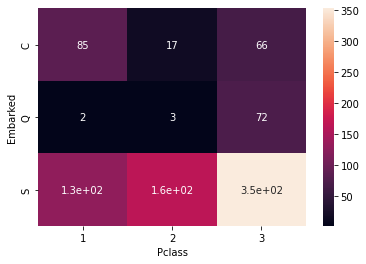

In [12]:
temp1 = titanic.groupby(['Embarked','Pclass'], as_index = False)['PassengerId'].count()
temp2 = temp1.pivot('Embarked','Pclass', 'PassengerId')
print(temp2)

sns.heatmap(temp2, annot = True)
plt.show()

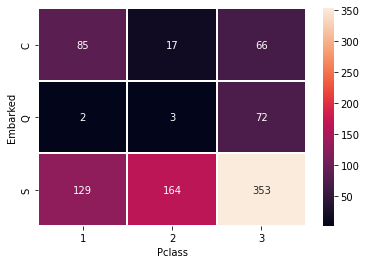

In [13]:
# 값을 정수로, 구간 간격을 살짝 벌려서 그리자.
sns.heatmap(temp2, annot = True, fmt = 'd', linewidth = .2)
plt.show()

* 추가 : pivot
    * pivot 함수를 이용하여 집계된 데이터를 재구성할 수 있습니다.
    * 문법 : dataframe.pivot(index, colums, values)


<img src='https://github.com/DA4BAM/image/blob/main/pivot.png?raw=true' width=600/>

### 연도별, 월별 평균 주가

① [groupby] stock 데이터를 이용하여 year별, month별 평균 주가(close)를 집계하시오.

In [14]:
temp1 = stock.groupby(['Year','Month'], as_index = False)['Close'].mean()

② [pivot]  'Year','Month', 'Close' 으로 피봇시키시오.

In [15]:
temp2 = temp1.pivot( 'Year','Month', 'Close')
temp2

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.090000,1942.802857,1959.647000,1941.925714
2015,1920.992857,1961.001176,2012.619091,2107.268182,2114.898889,2063.685909,2058.034348,1952.549000,1939.582500,2020.567143,2006.780952,1971.528571
2016,1894.651000,1900.610000,1976.502727,1996.170500,1966.675500,1977.029524,2002.482857,2036.656364,2042.555263,2036.032500,1981.746364,2021.666667
2017,2061.733500,2082.795000,2136.174545,2160.182500,2301.890000,2372.204286,2412.899048,2372.184545,2371.843810,2482.871250,2533.510000,2467.725789
2018,2520.937727,2439.104444,2451.570000,2458.224762,2461.300500,2394.507895,2284.253636,2283.796818,2307.325882,2153.476667,2083.333182,2070.128947
2019,2101.984091,2210.198824,2161.914500,2212.120455,2086.898095,2105.303158,2079.480000,1944.237619,2045.205263,NaN,NaN,NaN


③ heatmap을 그리시오.

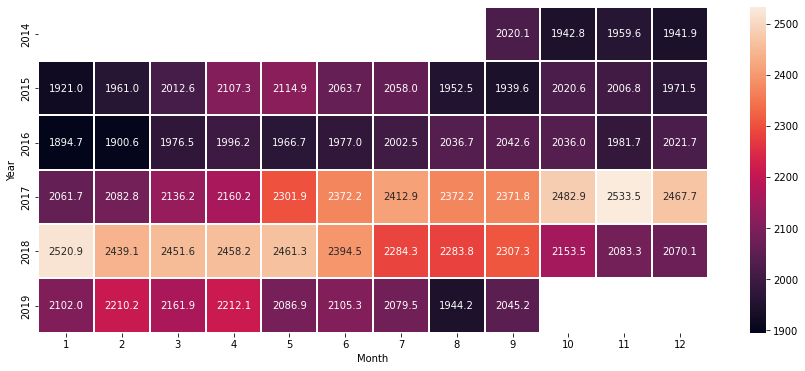

In [16]:
plt.figure(figsize = (15,6))
sns.heatmap(temp2, annot = True, fmt = '.1f', linewidth = .2)
plt.show()

## 3.시계열 데이터

In [17]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path, usecols = ['date',	'comp_sales'])
data = data.loc[data['date']<= '2015-12-31'].reset_index(drop = True)
data.columns = ['date',	'sales']
data.head(10)

,date,sales
0,2013-01-01,43
1,2013-01-02,57
2,2013-01-03,45
3,2013-01-04,45
4,2013-01-05,55
5,2013-01-06,56
6,2013-01-07,35
7,2013-01-08,50
8,2013-01-09,41
9,2013-01-10,68


In [18]:
data['date'] = pd.to_datetime(data['date'])

### 1) 날짜 요소 뽑기

| 메서드 | 내용|
|----|----|
data['date'].dt.date         		| YYYY-MM-DD(문자)
data['date'].dt.year         		| 연(4자리숫자)
data['date'].dt.month        		| 월(숫자)
data['date'].dt.month_name()		| 월(문자)
data['date'].dt.day          		| 일(숫자)
data['date'].dt.time         		| HH:MM:SS(문자)
data['date'].dt.hour         		| 시(숫자)
data['date'].dt.minute       		| 분(숫자)
data['date'].dt.second       		| 초(숫자)
data['date'].dt.quarter       		| 분기(숫자)
data['date'].dt.day_name()  	| 요일이름(문자)
data['date'].dt.weekday       		| 요일숫자(0-월, 1-화) (=dayofweek)
data['date'].dt.weekofyear    		| 연 기준 몇주째(숫자) (=week)
data['date'].dt.dayofyear     		| 연 기준 몇일째(숫자)
data['date'].dt.days_in_month 	| 월 일수(숫자) (=daysinmonth)



* 요일

In [19]:
data['date'].dt.day_name()

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
1090       Sunday
1091       Monday
1092      Tuesday
1093    Wednesday
1094     Thursday
Name: date, Length: 1095, dtype: object

In [20]:
# 문자열 길이를 첫 3글짜로 잘라서 저장하기
# .str.slice(시작, 끝)
data['date'].dt.day_name().str.slice(0, 3)

0       Tue
1       Wed
2       Thu
3       Fri
4       Sat
       ... 
1090    Sun
1091    Mon
1092    Tue
1093    Wed
1094    Thu
Name: date, Length: 1095, dtype: object

In [21]:
data['weekday'] = data['date'].dt.day_name().str.slice(0, 3)
data.head()

,date,sales,weekday
0,2013-01-01,43,Tue
1,2013-01-02,57,Wed
2,2013-01-03,45,Thu
3,2013-01-04,45,Fri
4,2013-01-05,55,Sat


### 2) shift

In [22]:
temp = data[['date', 'sales']].copy()
temp.head()

,date,sales
0,2013-01-01,43
1,2013-01-02,57
2,2013-01-03,45
3,2013-01-04,45
4,2013-01-05,55


In [ ]:
# shift(1)
temp['lag1'] = temp['sales'].shift()

# shift(2)
temp['lag2'] = temp['sales'].shift(2)

# shift(-1)
temp['lag_1'] = temp['sales'].shift(-1)
temp.head()

* 7일 전 판매량

In [ ]:
data['lag7'] = data['y'].shift(7)
data.head(10)

### 3) diff
특정 시점 대비 증감

In [ ]:
temp = data[['date', 'sales']].copy()
temp.head()

In [ ]:
# 전일대비 증감
temp['Diff1'] = temp['sales'].diff()

# 2일 전 대비 증가
temp['Diff2'] = temp['sales'].diff(2)

temp.head()

* 전일 대비 증감

In [ ]:
data['Diff1'] = data['sales'].diff()

* 7일 대비 증가

In [ ]:
data['Diff7'] = data['sales'].diff(7)

data.head(10)